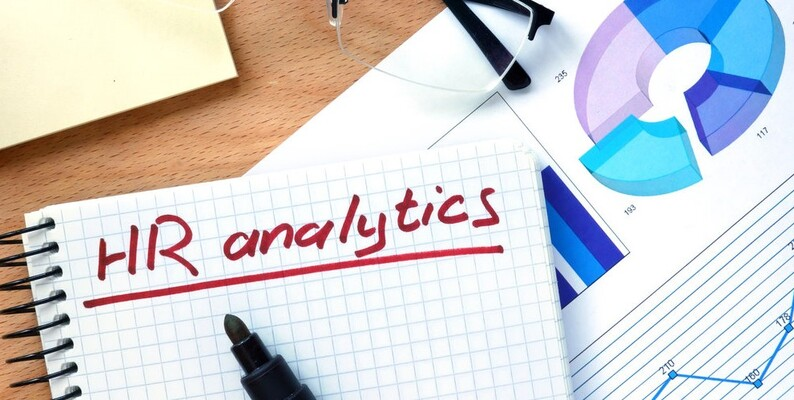

# **Project Tutorial: HR Analytics**

## I. **Project Description**: 

**This tutorial focuses on the data cleaning of the HR-Employee-Attrition dataset. [Datasource](https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction/data)**

## II. **Dataset Description**: 

**HR Analytics helps in interpreting organizational data. It finds the people related trends in the data and allows for HR Department to make appropriate steps in keeping the organization running smoothly and preiftably. Attrition in a corporation setup is one of the complex challenges that managers and HRs face in handling the organizational dataset**

## **1. Loading the Dependencies**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
pd.set_option("display.max_columns",200)
print("All libraries successfully loaded")

All libraries successfully loaded


## **2. Loading Dataset**

In [4]:
hr_employee = pd.read_csv("HR-Employee-Attrition.csv")

## 3. Feature Enginering Process: **_Understanding Dataset_**
 * Head or First 5 rows of data
 * Size of dataset: shape
 * Data columns
 * Data types and the number of these categorical: Nominal and Ordinal data types:
 * Information about dataset
 * Statistical description of dataset
 * Checking for NaN or missing values and sort in ascending order for clarity

### **i. Head or First 5 rows of data**

In [5]:
hr_employee.head(5) # First 5 rows of dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### **ii. Size of dataset: shape**

In [6]:
hr_employee.shape

(1470, 35)

#### **Observation**: The dataset is made of **1470 rows** and **35 feature columns**

### **iii. Data columns**

In [7]:
hr_employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### **iv. Data types and the number of these categorical: Nominal and Ordinal data types:**

In [8]:
hr_employee.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
categorical_col = hr_employee.select_dtypes(include = ["object"]).columns.tolist()

In [10]:
numberical_col = hr_employee.select_dtypes(include =["number"]).columns.tolist()

In [11]:
categorical_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [12]:
len(categorical_col) # length of cateogrical columns: 9

9

In [13]:
numberical_col # len of numerical columns: 26

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [14]:
len(numberical_col)

26

#### **_Observation_**: We have **_26 numerical feature columns_** and **_9 categorical feature columns_**

### **v. Information about Dataset**

In [15]:
hr_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### **_Observation_**: All feature columns have **1470 non-null** values indicating _no missing values_

### **vi. Statistical Description of Dataset**

In [16]:
hr_employee.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


## 4. Feature Enginering Process: **_First Data Cleaning Steps_**

* Deleting redundant columns.
* Renaming the columns.
* Dropping duplicates.
* Cleaning individual columns.
* Remove the NaN values from the dataset
* Check for some more Transformations

### **i. Deleting redundant columns**.

In [17]:
hr_employee.columns # Loading the columns of the dataset

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [18]:
cols_to_keep = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'HourlyRate','JobRole', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [19]:
cols_to_drop = ['EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
               'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance']

In [20]:
len(cols_to_keep) # len of cols_to_keep = 13

13

In [21]:
len(cols_to_drop) # len of cols_to_drop = 22

22

In [22]:
hr_employee = hr_employee[cols_to_keep]

In [23]:
hr_employee.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,HourlyRate,JobRole,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,94,Sales Executive,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,61,Research Scientist,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,92,Laboratory Technician,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,56,Research Scientist,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,40,Laboratory Technician,2,2,2,2


In [24]:
hr_employee.shape #New shape of the 

(1470, 13)

#### **_Observation_**: New hr_employee dataset has **_1470 row_** and **_13 feature columns_**

### **ii. Renaming the columns**.

In [25]:
hr_employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'HourlyRate', 'JobRole',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [26]:
hr_employee.rename({"BusinessTravel":"Business_Travel", "DailyRate":"Daily_Rate", "DistanceFromHome":"Distance_Home",
                    "HourlyRate": "Hourly_Rate", "JobRole": "Job_Role", "YearsAtCompany":"Years_At_Company", "YearsInCurrentRole": "Years_In_Current_Role",
                    "YearsSinceLastPromotion": "Years_Since_Last_Promotion", "YearsWithCurrManager":"Years_With_Current_Manager"}, inplace = True, axis = 1)

In [27]:
hr_employee.head(5)

,Age,Attrition,Business_Travel,Daily_Rate,Department,Distance_Home,Education,Hourly_Rate,Job_Role,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Current_Manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,94,Sales Executive,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,61,Research Scientist,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,92,Laboratory Technician,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,56,Research Scientist,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,40,Laboratory Technician,2,2,2,2


### **iii. Dropping Duplicates.**

In [28]:
hr_employee.duplicated(keep = "first").value_counts()

False    1470
Name: count, dtype: int64

#### **_Observation_**: There are **no duplicates** in the new hr_employee dataset

### **iv. Cleaning Individual Columns.**

In [29]:
hr_employee.head(5)

,Age,Attrition,Business_Travel,Daily_Rate,Department,Distance_Home,Education,Hourly_Rate,Job_Role,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Current_Manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,94,Sales Executive,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,61,Research Scientist,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,92,Laboratory Technician,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,56,Research Scientist,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,40,Laboratory Technician,2,2,2,2


In [30]:
hr_employee[hr_employee["Years_At_Company"] <= 8] 

,Age,Attrition,Business_Travel,Daily_Rate,Department,Distance_Home,Education,Hourly_Rate,Job_Role,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Current_Manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,94,Sales Executive,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,92,Laboratory Technician,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,56,Research Scientist,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,40,Laboratory Technician,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,79,Laboratory Technician,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,26,No,Travel_Rarely,1167,Sales,5,3,30,Sales Representative,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,41,Laboratory Technician,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,42,Healthcare Representative,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,87,Manufacturing Director,6,2,0,3


In [31]:
hr_employee[hr_employee["Attrition"] == "Yes"]  # This filters to the data to Attrition == "Yes" Only

,Age,Attrition,Business_Travel,Daily_Rate,Department,Distance_Home,Education,Hourly_Rate,Job_Role,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Current_Manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,94,Sales Executive,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,92,Laboratory Technician,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,50,Laboratory Technician,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,82,Sales Representative,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,83,Research Scientist,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,33,Sales Representative,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,36,Research Scientist,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,72,Laboratory Technician,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,94,Sales Executive,6,3,0,1


#### **a. Checking for uniqueness of the Attrition**

In [32]:
hr_employee["Attrition"].unique() # Attrition column has two object data type: ["Yes", "No"]

array(['Yes', 'No'], dtype=object)

#### **b. Removing "_" from the Business_Travel data column**

In [33]:
hr_employee["Business_Travel"] = hr_employee["Business_Travel"].str.replace("_", " ")

In [34]:
hr_employee.head(5)

,Age,Attrition,Business_Travel,Daily_Rate,Department,Distance_Home,Education,Hourly_Rate,Job_Role,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Current_Manager
0,41,Yes,Travel Rarely,1102,Sales,1,2,94,Sales Executive,6,4,0,5
1,49,No,Travel Frequently,279,Research & Development,8,1,61,Research Scientist,10,7,1,7
2,37,Yes,Travel Rarely,1373,Research & Development,2,2,92,Laboratory Technician,0,0,0,0
3,33,No,Travel Frequently,1392,Research & Development,3,4,56,Research Scientist,8,7,3,0
4,27,No,Travel Rarely,591,Research & Development,2,1,40,Laboratory Technician,2,2,2,2


### **v. Check for some more Transformations**

#### **a. Transforming all Attrition : "Yes" to 1 and "No" to 0**

In [35]:
hr_employee["Attrition"] = hr_employee["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)

In [36]:
hr_employee.head(5)

,Age,Attrition,Business_Travel,Daily_Rate,Department,Distance_Home,Education,Hourly_Rate,Job_Role,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Current_Manager
0,41,1,Travel Rarely,1102,Sales,1,2,94,Sales Executive,6,4,0,5
1,49,0,Travel Frequently,279,Research & Development,8,1,61,Research Scientist,10,7,1,7
2,37,1,Travel Rarely,1373,Research & Development,2,2,92,Laboratory Technician,0,0,0,0
3,33,0,Travel Frequently,1392,Research & Development,3,4,56,Research Scientist,8,7,3,0
4,27,0,Travel Rarely,591,Research & Development,2,1,40,Laboratory Technician,2,2,2,2


In [37]:
hr_employee["Attrition"].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [38]:
hr_employee.Attrition.dtype

dtype('int64')

In [39]:
hr_employee["Attrition"] = hr_employee["Attrition"].astype(bool)

In [40]:
hr_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1470 non-null   int64 
 1   Attrition                   1470 non-null   bool  
 2   Business_Travel             1470 non-null   object
 3   Daily_Rate                  1470 non-null   int64 
 4   Department                  1470 non-null   object
 5   Distance_Home               1470 non-null   int64 
 6   Education                   1470 non-null   int64 
 7   Hourly_Rate                 1470 non-null   int64 
 8   Job_Role                    1470 non-null   object
 9   Years_At_Company            1470 non-null   int64 
 10  Years_In_Current_Role       1470 non-null   int64 
 11  Years_Since_Last_Promotion  1470 non-null   int64 
 12  Years_With_Current_Manager  1470 non-null   int64 
dtypes: bool(1), int64(9), object(3)
memory usage: 13

#### **b. Final Checking of number of data types**

In [41]:
categorical_col = hr_employee.select_dtypes(include = ["object"]).columns.tolist()

In [42]:
numberical_col = hr_employee.select_dtypes(include =["number"]).columns.tolist()

In [43]:
categorical_col

['Business_Travel', 'Department', 'Job_Role']

In [44]:
numberical_col

['Age',
 'Daily_Rate',
 'Distance_Home',
 'Education',
 'Hourly_Rate',
 'Years_At_Company',
 'Years_In_Current_Role',
 'Years_Since_Last_Promotion',
 'Years_With_Current_Manager']

In [45]:
len(numberical_col)

9

In [46]:
bool_cat = hr_employee.select_dtypes(include =["bool"]).columns.tolist()

In [47]:
bool_cat

['Attrition']

#### **Observaton**: We have **_3 columns of object - str data type_**, **_9 columns of int data type_** and **_1 column of bool data_**

### **Exporting Cleaned Dataset: hr_employee**

In [48]:
hr_employee.to_csv("hr_employee_cleaned.csv", index = False)

In [49]:
## loading first 5 rows
hr_employee_cleaned = pd.read_csv("hr_employee_cleaned.csv")

In [50]:
hr_employee_cleaned.head(5)

,Age,Attrition,Business_Travel,Daily_Rate,Department,Distance_Home,Education,Hourly_Rate,Job_Role,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Current_Manager
0,41,True,Travel Rarely,1102,Sales,1,2,94,Sales Executive,6,4,0,5
1,49,False,Travel Frequently,279,Research & Development,8,1,61,Research Scientist,10,7,1,7
2,37,True,Travel Rarely,1373,Research & Development,2,2,92,Laboratory Technician,0,0,0,0
3,33,False,Travel Frequently,1392,Research & Development,3,4,56,Research Scientist,8,7,3,0
4,27,False,Travel Rarely,591,Research & Development,2,1,40,Laboratory Technician,2,2,2,2
